In [73]:
# Imports
#from mnist import MNIST
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random

In [74]:
# Load Data
#mndata = MNIST('./lib')
#mndata.gz = True
#mages, labels = mndata.load_training()
#images_1, labels_1 = mndata.load_testing()

(x_train, y_train), \
  (x_test, y_test) = \
  tf.keras.datasets.mnist.load_data()

In [75]:
# Feature Scaling
x_train, x_test = \
  x_train[..., np.newaxis]/255.0, \
  x_test[..., np.newaxis]/255.0


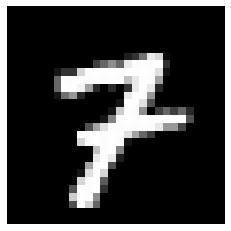

In [82]:
# Visualize Data
index = random.randrange(0, len(x_train))
#image = list(map(lambda a : a / 255.0, images[index])) # scale
#print(mndata.display(images[index]))

# Feature Creation
#image = np.reshape(image, newshape=(28, 28, 1))
#plt.figure(0)
#plt.imshow(image)
#plt.show()

plt.figure(1)
plt.imshow(x_train[index,:,:,0])
plt.gray()
plt.axis('off')
plt.show()